In [2]:
# some visualizations and testing on the keck tt data

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import signal, optimize

In [3]:
centroids = np.load('keck_tt/Centroid_n0088.npy')

(-0.2502528, 0.2502528)

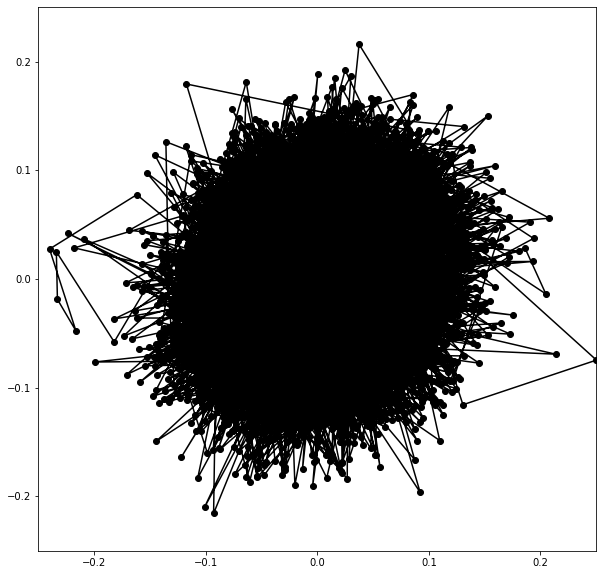

In [10]:
plt.figure(figsize=(10,10))
plt.plot(centroids[:,0], centroids[:,1], 'ko-')
lim = np.max(np.abs(centroids))
plt.xlim((-lim,lim))
plt.ylim((-lim,lim))

0.027929060187124703

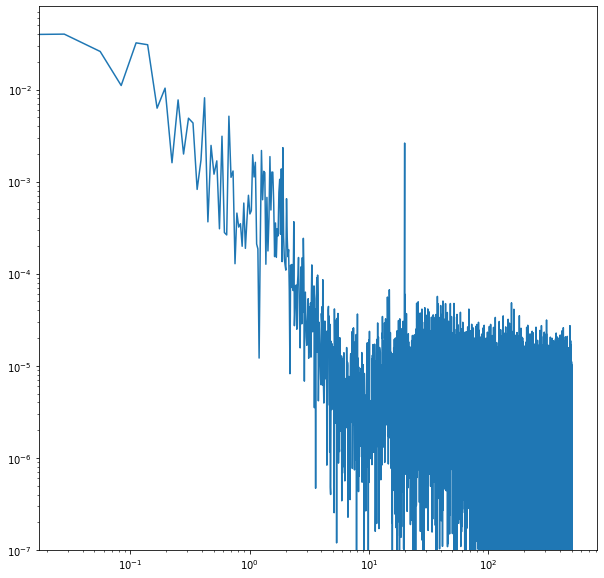

In [53]:
plt.figure(figsize=(10,10))
freqs, openloop_powers = signal.periodogram(openloop[:,0], fs=1000)
plt.ylim(1e-7, 2*np.max(openloop_powers))
plt.loglog(freqs, openloop_powers)
freqs[np.argmax(openloop_powers)]

In [58]:
power_law_to_fit = np.vectorize(lambda f, a, b, c: a/(f + b)**c)
par0 = [0.2, 200, 1.0]
par, cov = optimize.curve_fit(power_law_to_fit, freqs, openloop_powers, par0)
print(par)
plt.loglog(freqs, openloop_powers)
plt.loglog(freqs, power_law_to_fit(freqs, *par))
plt.ylim(1e-7)
print(np.diag(cov))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


TypeError: can't convert complex to float

In [12]:
openloop = np.load('keck_tt/OpenLoop_n0088.npy')

(-0.19884235, 0.19884235)

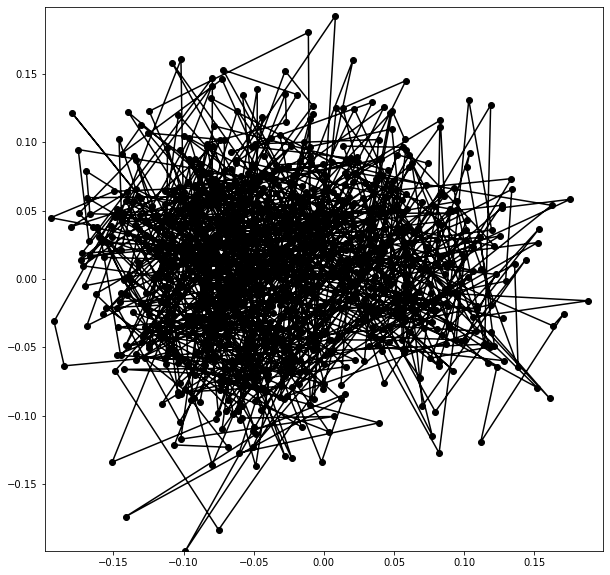

In [36]:
plt.figure(figsize=(10,10))
plt.plot(openloop[:1000,0], openloop[:1000,1], 'ko-')
lim = np.max(np.abs(openloop[:1000]))
plt.xlim((-lim,lim))
plt.ylim((-lim,lim))

In [15]:
commands = np.load('keck_tt/Commands_n0088.npy')

In [44]:
np.mean(np.abs(centroids[1:] + commands[:-1] - openloop))

0.0

(1e-07, 0.21041417124853853)

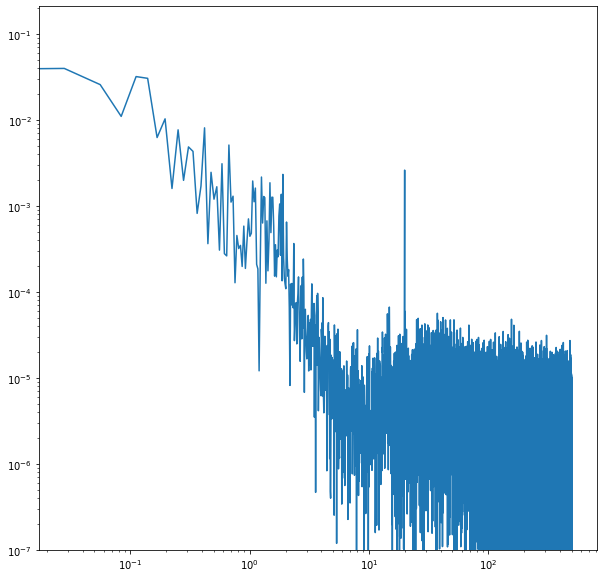

In [51]:
plt.figure(figsize=(10,10))
plt.loglog(*signal.periodogram(openloop[:,0], fs=1000))
plt.ylim(1e-7)